<a href="https://colab.research.google.com/github/Enkhamgalan1230/CO599-ML-Group-projects/blob/main/GroupProject_CO559.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a ipynb File for Group project **CO559**

Students in the Group: \

Enkh-Amgalan (Entwan) Enkhbayar (22135347)\
Muneef Mumthas (22206529) \
Crown Caesar (22038807) \
Brunaldo Cimo (22209954) \

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Testing for colab
print("Colab is active and ready.")

print("Welcome to the Python notebook for the Iris dataset analysis.")
print("M the Best")

Colab is active and ready.
Welcome to the Python notebook for the Iris dataset analysis.
M the Best


**Importing the Libraries**

In [7]:
# Import essential libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#Support Vector Machine (SVM) Algorithm
from sklearn import svm
#metrics is for checking the model accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
# This cell is specific to Google Colab
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive to access the Iris dataset CSV file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Iris Dataset**

In [9]:
# Define the path to the Iris dataset CSV file
path = "/content/drive/MyDrive/Iris.csv"

iris = pd.read_csv(path)
# We removed the column ID since the dataframe is indexed.
#Basically we dont need it
# Also this data is very clean as well as small we dont have to do pre-process the data.
iris.drop('Id', axis=1, inplace=True)

iris.head()
#Sampling the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.shape
# 150 records and 5 columns

(150, 5)

In [11]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Visual representation for Iris dataset.**

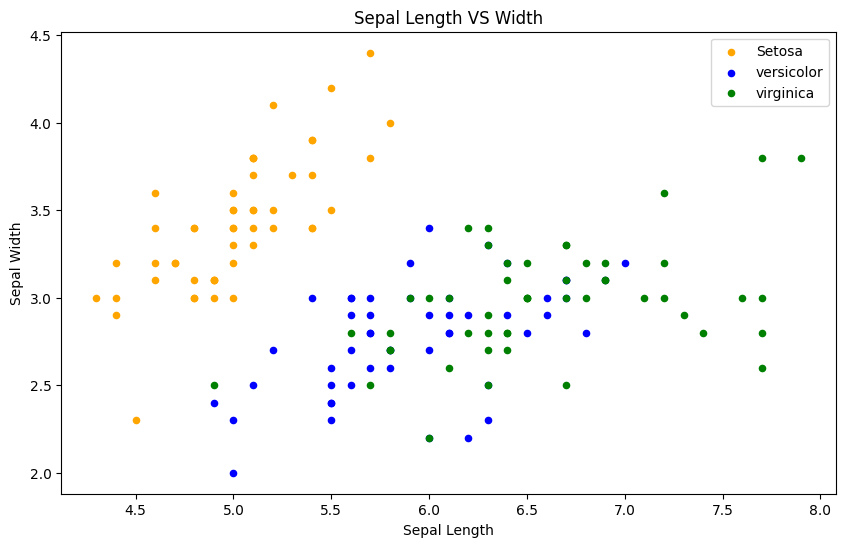

In [13]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
# gcf - get current figure
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

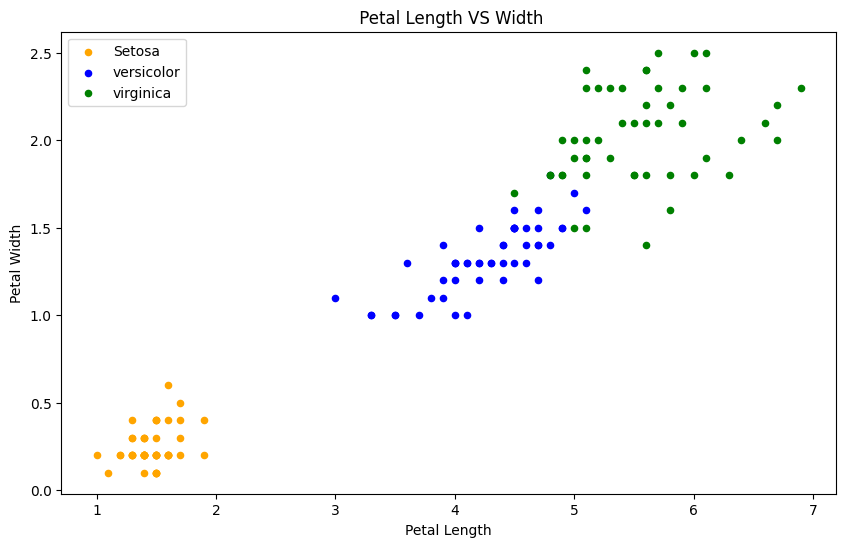

In [14]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

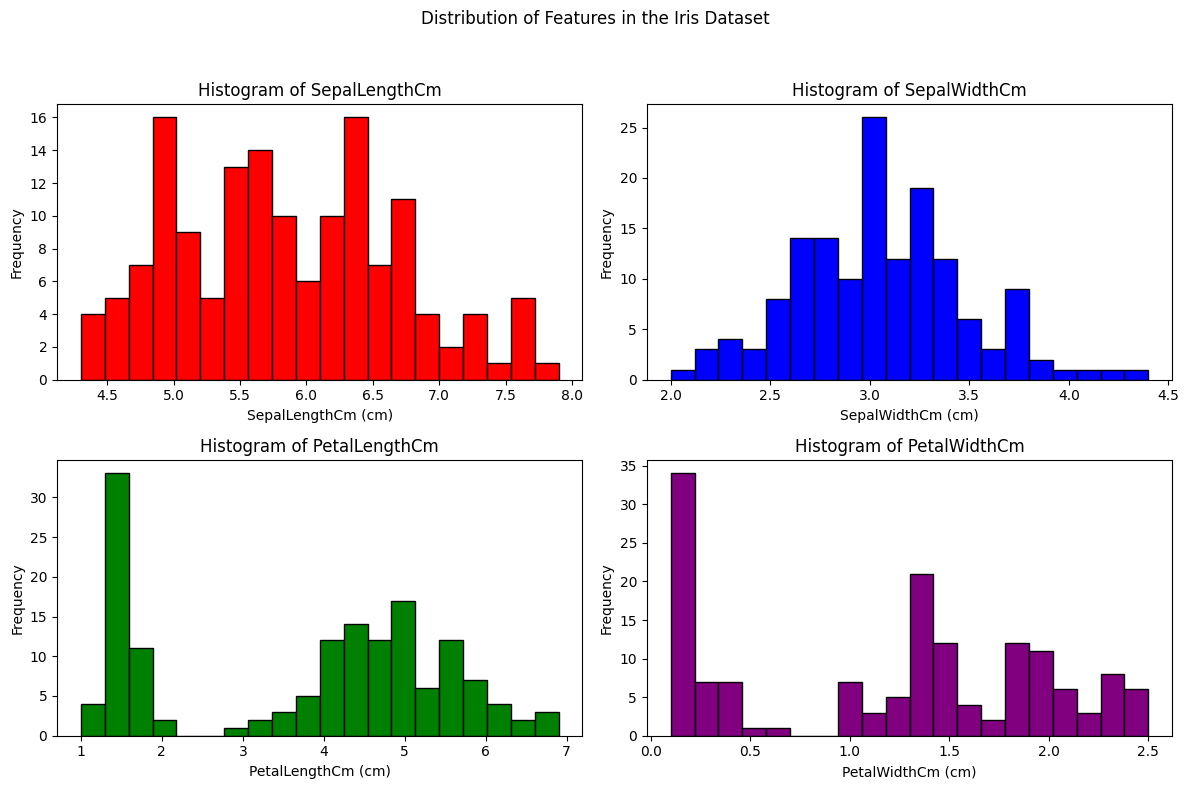

In [15]:
# Define a list of colors for each feature
colors = ['red', 'blue', 'green', 'purple']

# Plot histograms for each feature in the dataset
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Features in the Iris Dataset')
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i, ax in enumerate(axes.flat):
    ax.hist(iris[features[i]], bins=20, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {features[i]}')
    ax.set_xlabel(f'{features[i]} (cm)')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])

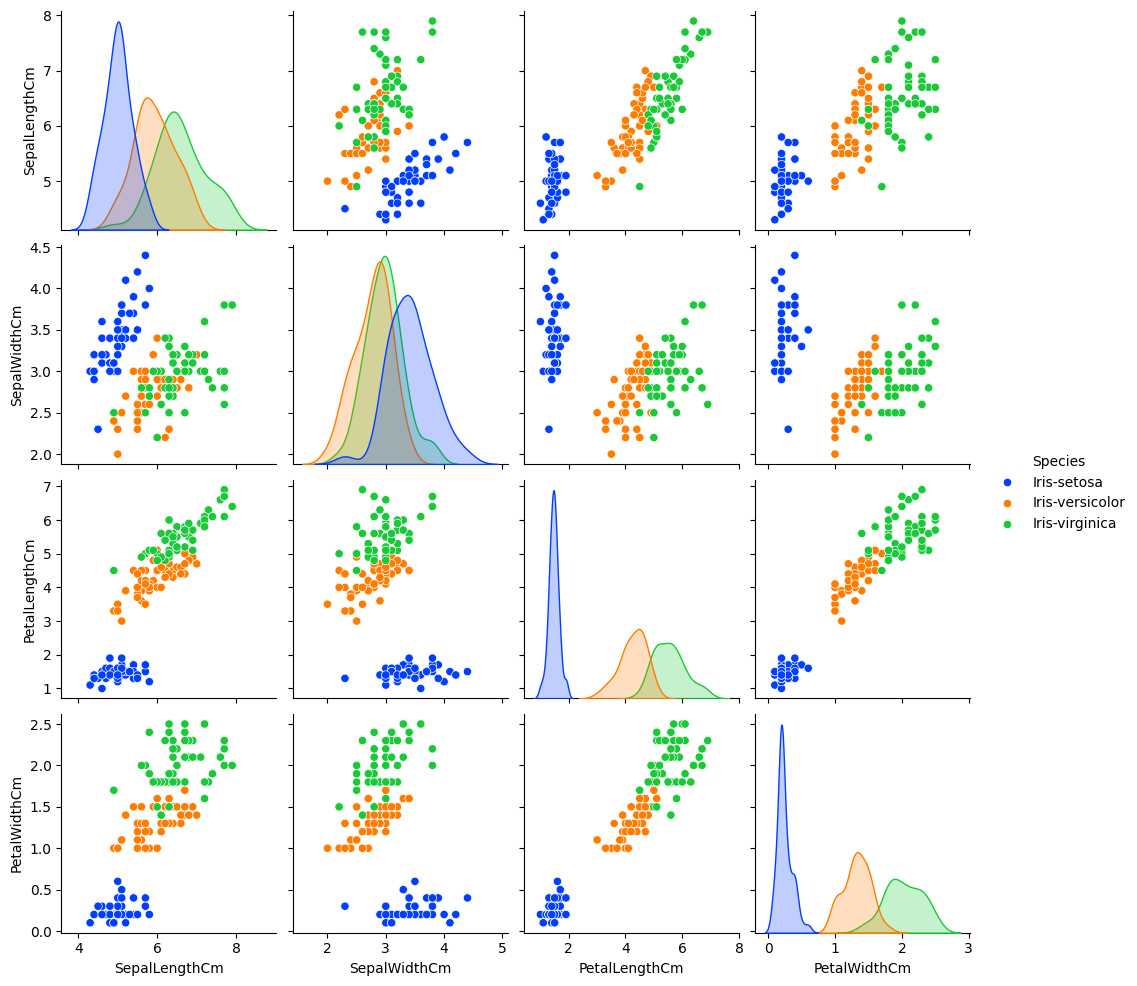

In [16]:
sns.pairplot(iris, hue='Species', palette='bright')

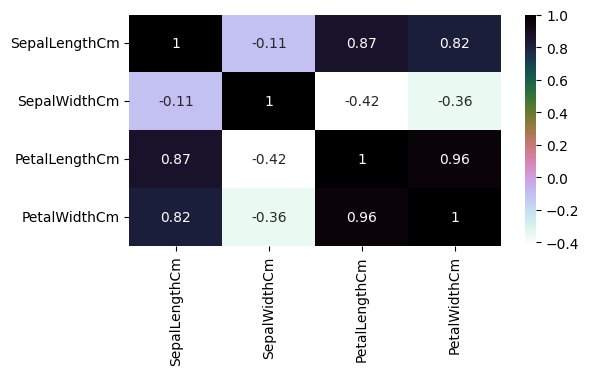

In [17]:
# draws  heatmap with input as the correlation matrix
plt.figure(figsize=(6,3))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='cubehelix_r')
plt.show()

**Note**

For certain datasets like the Iris dataset, which is relatively small and not very complex, finding a split that results in very high accuracies is possible, especially when the training set happens to include a variety of examples that perfectly represent the distribution of the entire dataset.

Setting a random_state there ensures the randomness is consistent across runs, which can lead to consistently replicating exactly the same model each time.

We are facing problem where accuracy percentage was 100 which means overfitting and not really acceptable. When we changed the random state or set it to None, the train-test split and any random processes within the learning algorithms will differ every time we run the code. This can result in:


*   Different subsets of data in the training and testing sets.
*   Slightly different model parameters due to different initialization and training processes.


In [18]:
# Split the data into training and testing sets with a test size of 20%
train_X, test_X, train_Y, test_Y = train_test_split(
    iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]],
    iris["Species"],
    test_size=0.3,
    random_state = None
)
#output value of test data
# In this one we are taking all features!
# 1. X- Taking the training data features, output of our training data
# 2. Y - Taking test data features, output value of test data
# The dataset will be divided into two sets which are going to bed used for testing as well as training
# 70% - training, 30% - testing

In [19]:
train_X.shape, train_Y.shape

((105, 4), (105,))

In [20]:
test_X.shape, test_Y.shape

((45, 4), (45,))

In [21]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,5.0,3.5,1.3,0.3
133,6.3,2.8,5.1,1.5
109,7.2,3.6,6.1,2.5
26,5.0,3.4,1.6,0.4
73,6.1,2.8,4.7,1.2


In [22]:
train_Y.head()

40         Iris-setosa
133     Iris-virginica
109     Iris-virginica
26         Iris-setosa
73     Iris-versicolor
Name: Species, dtype: object

In [23]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
31,5.4,3.4,1.5,0.4
105,7.6,3.0,6.6,2.1
120,6.9,3.2,5.7,2.3
126,6.2,2.8,4.8,1.8


In [24]:
test_Y.head()

41        Iris-setosa
31        Iris-setosa
105    Iris-virginica
120    Iris-virginica
126    Iris-virginica
Name: Species, dtype: object

**Support Vector Machine SVM**

SVM regression or Support Vector Regression (SVR) is a machine learning algorithm used for regression analysis. It is different from traditional linear regression methods as it finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points.

The accuracy of the SVM is: 0.955555555556


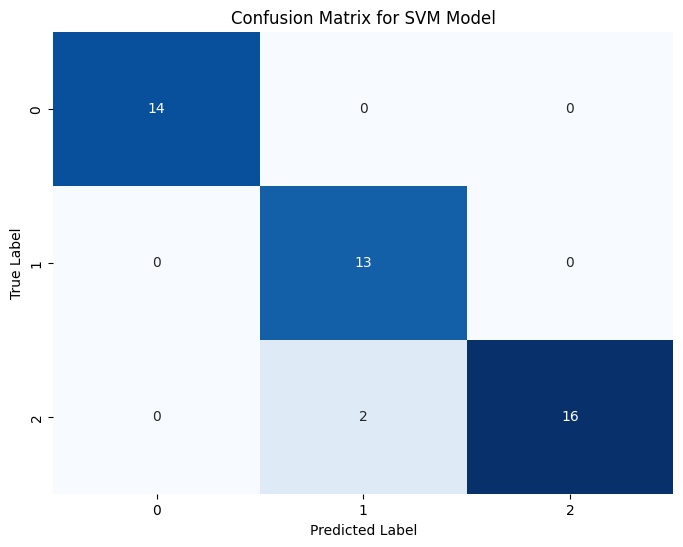

In [25]:
# Initialize and train the Support Vector Machine (SVM) model
model = svm.SVC()
model.fit(train_X,train_Y)
prediction1 = model.predict(test_X)
accuracy_svm = accuracy_score(test_Y, prediction1)
print(f'The accuracy of the SVM is: {accuracy_svm:.12f}')

conf_matrix = confusion_matrix(test_Y, prediction1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Logistic Regression**

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

The accuracy of the Logistic Regression is: 0.977777777778


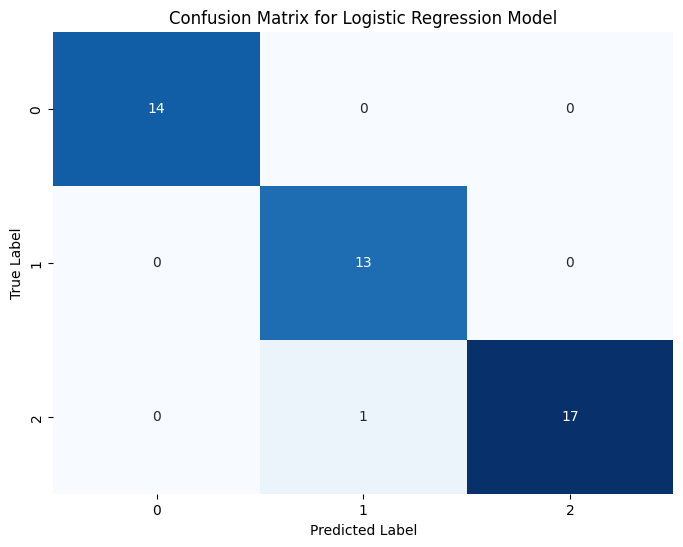

In [26]:
# Logistic Regression Model
model2 = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model2.fit(train_X, train_Y)
prediction2 = model2.predict(test_X) # Corrected to use model2 for prediction
accuracy_LR = accuracy_score(test_Y, prediction2)
print(f'The accuracy of the Logistic Regression is: {accuracy_LR:.12f}')

conf_matrix_LR = confusion_matrix(test_Y, prediction2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision tree**

Decision trees are an approach used in supervised machine learning, a technique which uses labelled input and output datasets to train models. The approach is used mainly to solve classification problems, which is the use of a model to categorise or classify an object.

The accuracy of the Decision Tree is: 0.955555555556


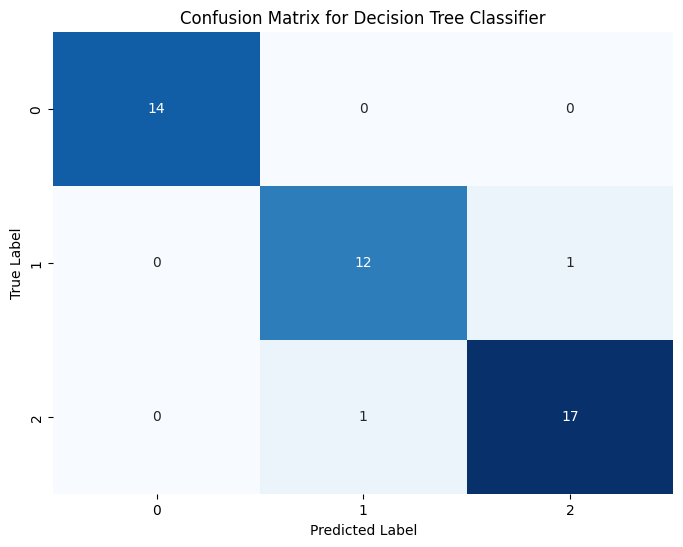

In [27]:
# Decision Tree Classifier
model3 = DecisionTreeClassifier()
model3.fit(train_X, train_Y)
prediction3 = model3.predict(test_X) # Corrected to use model3 for prediction
accuracy_DT = accuracy_score(test_Y, prediction3)
print(f'The accuracy of the Decision Tree is: {accuracy_DT:.12f}')

conf_matrix_dt = confusion_matrix(test_Y, prediction3)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**The k-nearest neighbors**

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today.

In [28]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_Y)
    pred_i = knn.predict(test_X)
    error_rate.append(np.mean(pred_i != test_Y))

Text(0, 0.5, 'Error Rate')

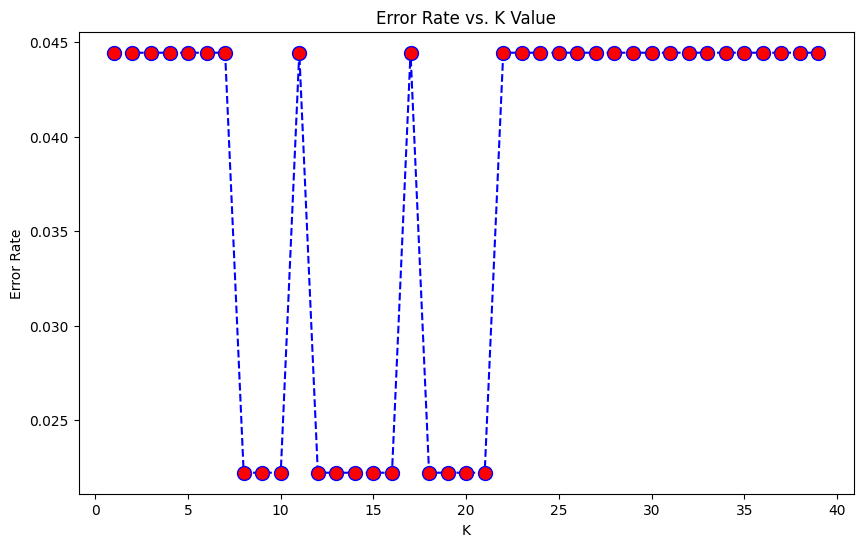

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The accuracy of the KNN is: 0.977777777778


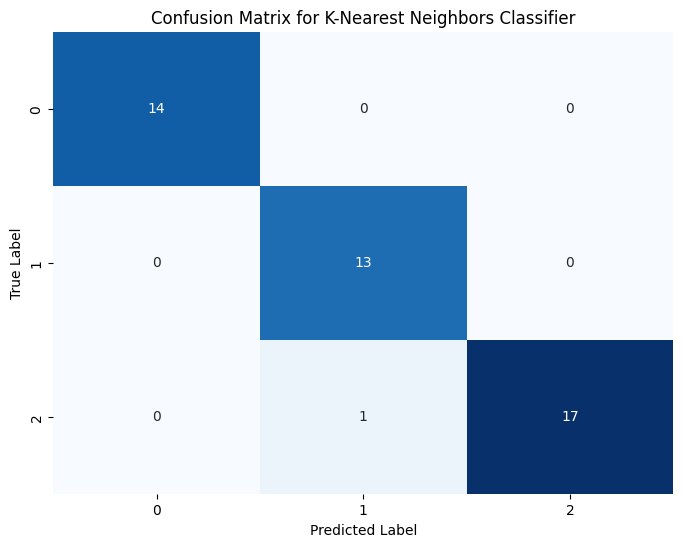

In [39]:
# K-Nearest Neighbors Classifier
model4 = KNeighborsClassifier(n_neighbors=8)
model4.fit(train_X, train_Y)
prediction4 = model4.predict(test_X) # Corrected to use model4 for prediction
accuracy_KNN = accuracy_score(test_Y, prediction4)
print(f'The accuracy of the KNN is: {accuracy_KNN:.12f}')

# Create the confusion matrix
conf_matrix_knn = confusion_matrix(test_Y, prediction4)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

These examples above we took all features. So now we can take just sepals and petals.


In [30]:
# Dividing the dataframe into two
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [31]:

#Petal
train_petal,test_petal = train_test_split(petal,test_size=0.3,random_state=None)
train_x_petal = train_petal[['PetalWidthCm','PetalLengthCm']]
train_y_petal = train_petal.Species
test_x_petal = test_petal[['PetalWidthCm','PetalLengthCm']]
test_y_petal = test_petal.Species

#Sepal
train_sepal,test_sepal = train_test_split(sepal,test_size=0.3,random_state=None)
train_x_sepal = train_sepal[['SepalWidthCm','SepalLengthCm']]
train_y_sepal = train_sepal.Species
test_x_sepal = test_sepal[['SepalWidthCm','SepalLengthCm']]
test_y_sepal = test_sepal.Species

In [32]:
#SVM
model=svm.SVC()
model.fit(train_x_petal,train_y_petal)
prediction=model.predict(test_x_petal)
accuracy_SVM_p = metrics.accuracy_score(test_y_petal, prediction)
print(f'The accuracy of the SVM using Petals is: {accuracy_SVM_p:.12f}')

model=svm.SVC()
model.fit(train_x_sepal,train_y_sepal)
prediction=model.predict(test_x_sepal)
accuracy_SVM_s = metrics.accuracy_score(test_y_sepal, prediction)
print(f'The accuracy of the SVM using Sepals is: {accuracy_SVM_s:.12f}')


The accuracy of the SVM using Petals is: 0.911111111111
The accuracy of the SVM using Sepals is: 0.844444444444


In [33]:
#Logistic Regression
model= LogisticRegression()
model.fit(train_x_petal,train_y_petal)
prediction=model.predict(test_x_petal)
accuracy_LR_p = metrics.accuracy_score(test_y_petal, prediction)
print(f'The accuracy of the Logistic Regression using Petals is: {accuracy_LR_p:.12f}')

model= LogisticRegression()
model.fit(train_x_sepal,train_y_sepal)
prediction=model.predict(test_x_sepal)
accuracy_LR_s = metrics.accuracy_score(test_y_sepal, prediction)
print(f'The accuracy of the Logistic Regression using Sepals is: {accuracy_LR_s:.12f}')

The accuracy of the Logistic Regression using Petals is: 0.933333333333
The accuracy of the Logistic Regression using Sepals is: 0.777777777778


In [34]:
# Decision Tree
model= DecisionTreeClassifier()
model.fit(train_x_petal,train_y_petal)
prediction=model.predict(test_x_petal)
accuracy_DT_p = metrics.accuracy_score(test_y_petal, prediction)
print(f'The accuracy of the Decision Tree using Petals is: {accuracy_DT_p:.12f}')

model= DecisionTreeClassifier()
model.fit(train_x_sepal,train_y_sepal)
prediction=model.predict(test_x_sepal)
accuracy = metrics.accuracy_score(test_y_sepal, prediction)
print(f'The accuracy of the Decision Tree using Sepals is: {accuracy_DT_p:.12f}')

The accuracy of the Decision Tree using Petals is: 0.911111111111
The accuracy of the Decision Tree using Sepals is: 0.911111111111


In [40]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x_petal,train_y_petal)
    pred_i = knn.predict(test_x_petal)
    error_rate.append(np.mean(pred_i != test_y_petal))

Text(0, 0.5, 'Error Rate')

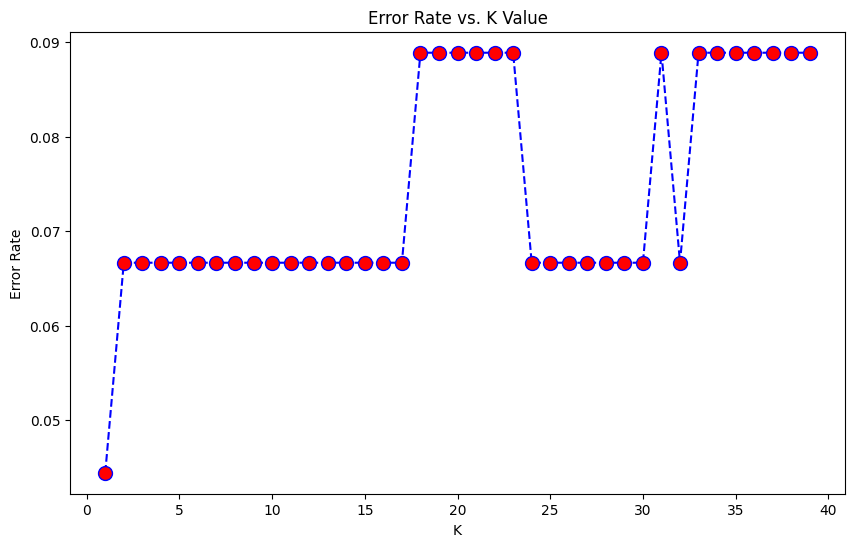

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
# k nearest Neighbour
model= KNeighborsClassifier(n_neighbors=8)
model.fit(train_x_petal,train_y_petal)
prediction=model.predict(test_x_petal)
accuracy_KNN_p = metrics.accuracy_score(test_y_petal, prediction)
print(f'The accuracy of the k nearest Neighbour using Petals is: {accuracy_KNN_p:.12f}')

model= KNeighborsClassifier(n_neighbors=8)
model.fit(train_x_sepal,train_y_sepal)
prediction=model.predict(test_x_sepal)
accuracy_KNN_s = metrics.accuracy_score(test_y_sepal, prediction)
print(f'The accuracy of the k nearest Neighbour using Sepals is: {accuracy_KNN_s:.12f}')

The accuracy of the k nearest Neighbour using Petals is: 0.933333333333
The accuracy of the k nearest Neighbour using Sepals is: 0.822222222222


In [44]:
# Expanded accuracy data
expanded_data = {
    'Feature Set': ['Petals', 'Sepals', 'Petals', 'Sepals', 'Petals', 'Sepals', 'Petals', 'Sepals',
                    'All Features', 'All Features', 'All Features', 'All Features'],
    'Model': ['SVM', 'SVM', 'Logistic Regression', 'Logistic Regression', 'Decision Tree', 'Decision Tree',
              'K Nearest Neighbour', 'K Nearest Neighbour', 'SVM', 'Logistic Regression',
              'Decision Tree', 'K Nearest Neighbour'],
    'Accuracy': [
        accuracy_SVM_p, accuracy_SVM_s, accuracy_LR_p, accuracy_LR_s,
        accuracy_DT_p, accuracy, accuracy_KNN_p, accuracy_KNN_s,
        accuracy_svm, accuracy_LR, accuracy_DT, accuracy_KNN
    ]
}

# Convert the expanded dataset to DataFrame
expanded_accuracy_df = pd.DataFrame(expanded_data)

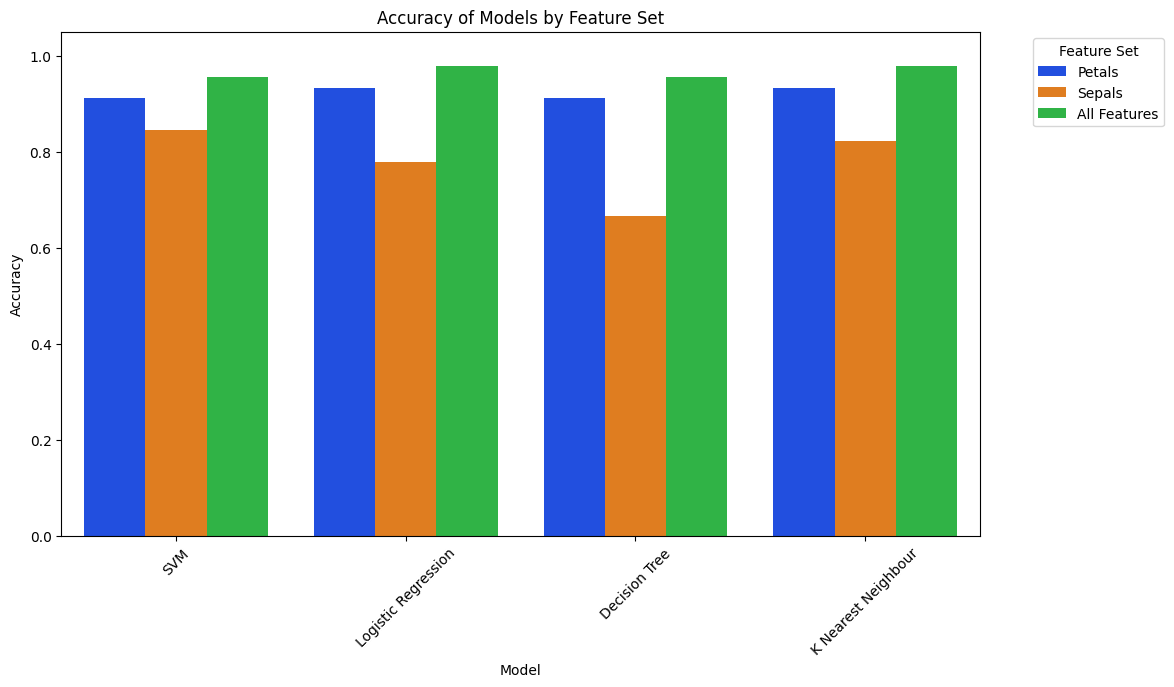

In [45]:

plt.figure(figsize=(10, 6))
sns.barplot(y='Accuracy', x='Model', hue='Feature Set', data=expanded_accuracy_df, palette='bright')  # Using 'bright' palette
plt.title('Accuracy of Models by Feature Set')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1.05)  # Adjusted for vertical orientation
plt.tight_layout()
plt.legend(title='Feature Set', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.show()
